In [4]:
import tensorflow as tf
import os 
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)
# gpu

In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)



In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 457 files belonging to 2 classes.


I0000 00:00:1742021420.611149   13569 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [8]:
data_iterator = data.as_numpy_iterator()


In [9]:
batch = data_iterator.next()


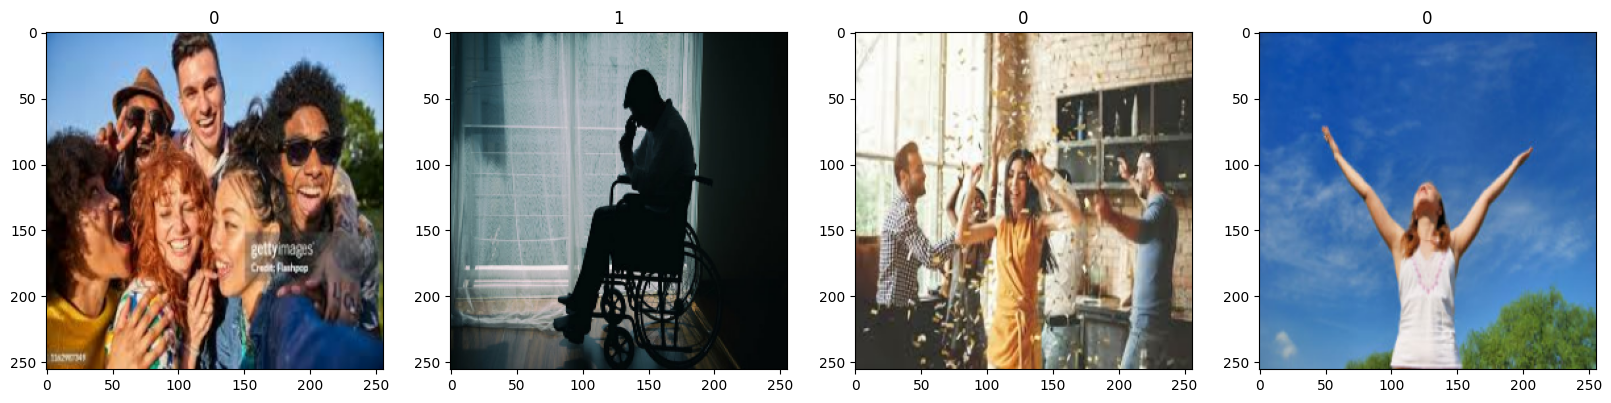

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))


In [12]:
data.as_numpy_iterator().next()


(array([[[[0.34117648, 0.34509805, 0.3137255 ],
          [0.3466299 , 0.35055146, 0.3191789 ],
          [0.32156864, 0.3254902 , 0.29411766],
          ...,
          [0.3858456 , 0.38976717, 0.37015933],
          [0.38039216, 0.38431373, 0.3647059 ],
          [0.38039216, 0.38431373, 0.3647059 ]],
 
         [[0.32616422, 0.33008578, 0.29871324],
          [0.33400735, 0.33792892, 0.30655637],
          [0.32156864, 0.3254902 , 0.29411766],
          ...,
          [0.37254903, 0.3764706 , 0.35686275],
          [0.38039216, 0.38431373, 0.3647059 ],
          [0.38039216, 0.38431373, 0.3647059 ]],
 
         [[0.32941177, 0.33333334, 0.3019608 ],
          [0.3362745 , 0.34019607, 0.30882353],
          [0.33333334, 0.3372549 , 0.30588236],
          ...,
          [0.38431373, 0.3882353 , 0.36862746],
          [0.38039216, 0.38431373, 0.3647059 ],
          [0.38039216, 0.38431373, 0.3647059 ]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

10

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()


In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/somya/Image Classifier/my_tf_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
logsdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


I0000 00:00:1742021425.332017   14143 service.cc:152] XLA service 0x7f18c00056c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742021425.332341   14143 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-03-15 02:50:25.598794: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742021426.032267   14143 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4896 - loss: 0.7252

I0000 00:00:1742021430.019478   14143 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.5192 - loss: 0.7163 - val_accuracy: 0.6562 - val_loss: 0.6606
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6588 - loss: 0.6704 - val_accuracy: 0.6042 - val_loss: 0.6383
Epoch 3/20


2025-03-15 02:50:33.191653: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6487 - loss: 0.6211 - val_accuracy: 0.7812 - val_loss: 0.4664
Epoch 4/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7812 - loss: 0.5080

2025-03-15 02:50:34.500784: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8017 - loss: 0.4693 - val_accuracy: 0.7708 - val_loss: 0.4797
Epoch 5/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6562 - loss: 0.5781

2025-03-15 02:50:35.833611: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7907 - loss: 0.4628 - val_accuracy: 0.8750 - val_loss: 0.3571
Epoch 6/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9062 - loss: 0.3292

2025-03-15 02:50:36.986220: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8828 - loss: 0.3290 - val_accuracy: 0.8646 - val_loss: 0.3535
Epoch 7/20


2025-03-15 02:50:38.091529: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.8515 - loss: 0.3578 - val_accuracy: 0.9479 - val_loss: 0.3153
Epoch 8/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9062 - loss: 0.2431

2025-03-15 02:50:39.374562: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9273 - loss: 0.2600 - val_accuracy: 0.9688 - val_loss: 0.1168
Epoch 9/20


2025-03-15 02:50:40.427127: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9155 - loss: 0.1718 - val_accuracy: 0.9062 - val_loss: 0.1974
Epoch 10/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9688 - loss: 0.1564

2025-03-15 02:50:41.556789: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9460 - loss: 0.1825

2025-03-15 02:50:42.818715: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9468 - loss: 0.1828 - val_accuracy: 0.9688 - val_loss: 0.1067
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9756 - loss: 0.1183 - val_accuracy: 0.9375 - val_loss: 0.1485
Epoch 12/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9688 - loss: 0.0967

2025-03-15 02:50:44.252851: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9396 - loss: 0.1446 - val_accuracy: 0.9792 - val_loss: 0.0827
Epoch 13/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0463

2025-03-15 02:50:45.482149: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9774 - loss: 0.0766 - val_accuracy: 0.9792 - val_loss: 0.0585
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9600 - loss: 0.0740 - val_accuracy: 0.9896 - val_loss: 0.0586
Epoch 15/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9688 - loss: 0.1268

2025-03-15 02:50:47.575610: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9773 - loss: 0.0845 - val_accuracy: 0.9896 - val_loss: 0.0398
Epoch 16/20


2025-03-15 02:50:48.784603: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9902 - loss: 0.0318 - val_accuracy: 0.9896 - val_loss: 0.0382
Epoch 17/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0090

2025-03-15 02:50:49.866362: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9878 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 18/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9688 - loss: 0.1255

2025-03-15 02:50:50.932292: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9781 - loss: 0.0789 - val_accuracy: 0.9896 - val_loss: 0.0715
Epoch 19/20
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 1.0000 - loss: 0.0444

2025-03-15 02:50:52.024483: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9907 - loss: 0.0532 - val_accuracy: 0.9896 - val_loss: 0.0255
Epoch 20/20


2025-03-15 02:50:53.141361: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9973 - loss: 0.0355 - val_accuracy: 0.9896 - val_loss: 0.0267


2025-03-15 02:50:54.258105: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166336 bytes after encountering the first element of size 25166336 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


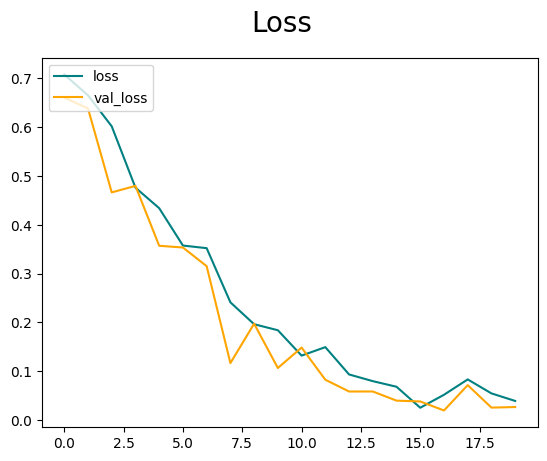

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

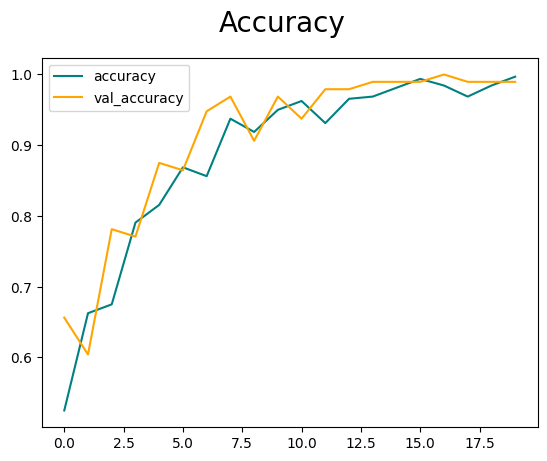

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    
print(pre.result(), re.result(), acc.result())

2025-03-15 02:50:55.113979: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


2025-03-15 02:50:55.622450: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


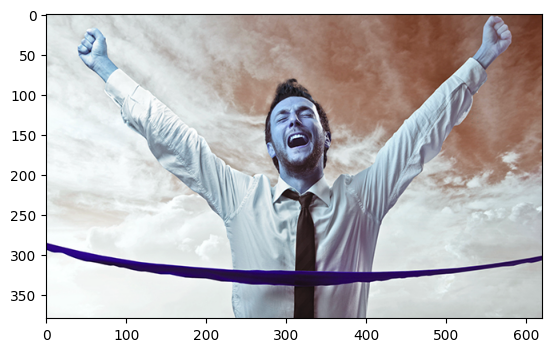

In [28]:
img = cv2.imread('data/Happy Images/Successful-year.jpg')
plt.imshow(img)
plt.show()

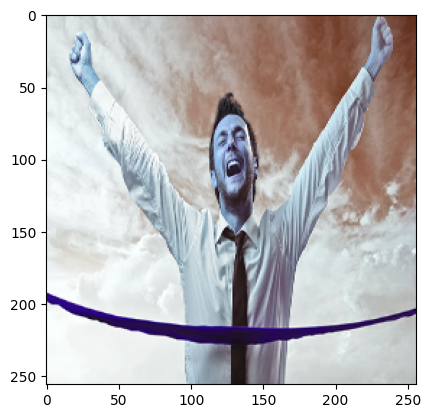

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


array([[0.22481047]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(f"Error setting GPU: {e}")
else:
    print("No GPU detected!")

# Explicitly assign a GPU to your model
with tf.device('/GPU:0'):
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)),
        MaxPooling2D(),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.summary()


Error setting GPU: Physical devices cannot be modified after being initialized


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)